20213043 이세현

In [1]:
import pandas as pd

data = []

for line in open("iris.data", "r"):
    raw = line.split(",")
    x = [float(r) for r in raw[:4]]
    y = raw[4].strip()
    data.append((x,y))
    print(x,y)

data

[5.1, 3.5, 1.4, 0.2] Iris-setosa
[4.9, 3.0, 1.4, 0.2] Iris-setosa
[4.7, 3.2, 1.3, 0.2] Iris-setosa
[4.6, 3.1, 1.5, 0.2] Iris-setosa
[5.0, 3.6, 1.4, 0.2] Iris-setosa
[5.4, 3.9, 1.7, 0.4] Iris-setosa
[4.6, 3.4, 1.4, 0.3] Iris-setosa
[5.0, 3.4, 1.5, 0.2] Iris-setosa
[4.4, 2.9, 1.4, 0.2] Iris-setosa
[4.9, 3.1, 1.5, 0.1] Iris-setosa
[5.4, 3.7, 1.5, 0.2] Iris-setosa
[4.8, 3.4, 1.6, 0.2] Iris-setosa
[4.8, 3.0, 1.4, 0.1] Iris-setosa
[4.3, 3.0, 1.1, 0.1] Iris-setosa
[5.8, 4.0, 1.2, 0.2] Iris-setosa
[5.7, 4.4, 1.5, 0.4] Iris-setosa
[5.4, 3.9, 1.3, 0.4] Iris-setosa
[5.1, 3.5, 1.4, 0.3] Iris-setosa
[5.7, 3.8, 1.7, 0.3] Iris-setosa
[5.1, 3.8, 1.5, 0.3] Iris-setosa
[5.4, 3.4, 1.7, 0.2] Iris-setosa
[5.1, 3.7, 1.5, 0.4] Iris-setosa
[4.6, 3.6, 1.0, 0.2] Iris-setosa
[5.1, 3.3, 1.7, 0.5] Iris-setosa
[4.8, 3.4, 1.9, 0.2] Iris-setosa
[5.0, 3.0, 1.6, 0.2] Iris-setosa
[5.0, 3.4, 1.6, 0.4] Iris-setosa
[5.2, 3.5, 1.5, 0.2] Iris-setosa
[5.2, 3.4, 1.4, 0.2] Iris-setosa
[4.7, 3.2, 1.6, 0.2] Iris-setosa
[4.8, 3.1,

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


In [2]:
def distance(a, b):
    s = 0
    for x, y in zip(a, b):
        s += (x-y) ** 2
    return s**0.5

def distance2(a, b):
    return sum((x-y)**2 for x, y in zip(a, b))**0.5

In [3]:
print(data[0][0])
print(data[1][0])
print(distance(data[0][0], data[1][0]))
print(distance2(data[0][0], data[1][0]))

[5.1, 3.5, 1.4, 0.2]
[4.9, 3.0, 1.4, 0.2]
0.5385164807134502
0.5385164807134502


In [4]:
from collections import Counter

def knn_classify(k, query, train):
    res = sorted((distance(query, v), l) for v, l in train)[:k]
    cnts = Counter(r[1] for r in res)

    mc = cnts.most_common(2)

    while len(cnts) >= 2 and mc[0][0] == mc[1][1]:
        res = res[:-1]
        cnts = Counter(r[1] for r in res)
        
    return cnts.most_common(1)[0][0]
    
knn_classify(10, [5.5, 3.1, 5.0, 1.7], data)

'Iris-virginica'

In [5]:
k = 5
n_correct = 0
n_incorrect = 0

for i, q in enumerate(data):
    new_data = []
    for j, d in enumerate(data):
        if i==j: continue
        new_data.append(d)

    ans = knn_classify(k, q[0], new_data)
    true_ans = q[1]

    if ans == true_ans:
        n_correct += 1
    else:
        n_incorrect += 1

print("정확도", n_correct / (n_correct + n_incorrect))

정확도 0.9666666666666667


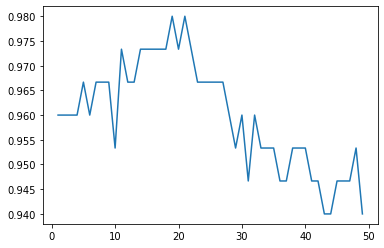

In [6]:
import matplotlib.pyplot as plt

X = [] # k
Y = []

for k in range(1, 50):
    n_correct = 0
    n_incorrect = 0

    for i, q in enumerate(data):
        new_data = []
        for j, d in enumerate(data):
            if i==j: continue
            new_data.append(d)

        ans = knn_classify(k, q[0], new_data)
        true_ans = q[1]

        if ans == true_ans:
            n_correct += 1
        else:
            n_incorrect += 1

    X.append(k)
    Y.append(n_correct / (n_correct + n_incorrect))

plt.plot(X, Y)
plt.show()